In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LassoCV
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LassoCV
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler



import warnings
warnings.filterwarnings("ignore")

# from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
###############################################################################
### local imports                                                           ###
###############################################################################

import acquire as acq
import prepare as prep

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
from dfo import DFO, set_dfo

In [8]:
 from wrangle_zillow import get_zillow_data, prep_zillow_data, sqls, get_zillow_local_data

Acquire & Summarize
Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid .
Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
Only include properties that include a latitude and longitude value.

In [9]:
dfo = set_dfo(get_zillow_local_data(csv='zillow_local_mvp.csv'), splain=True)

In [10]:
df = dfo.df

In [11]:
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,structuretaxvaluedollarcnt,structuredollarpersqft,logerror
0,0,14297519,3.5,4.0,3100.0,33634931.0,-117869207.0,485713.0,156.681613,0.025595
1,1,17052889,1.0,2.0,1465.0,34449266.0,-119281531.0,88000.0,60.068259,0.055619
2,2,14186244,2.0,3.0,1243.0,33886168.0,-117823170.0,85289.0,68.615447,0.005383
3,3,12177905,3.0,4.0,2376.0,34245180.0,-118240722.0,108918.0,45.840909,-0.103410
4,4,12095076,3.0,4.0,2962.0,34145202.0,-118179824.0,276684.0,93.411209,-0.001011


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = df['logerror']
X= df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Training the Model
Now its time to train our model on our training data!

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train) 
print(lm.score(X_test, y_test)) 

0.002600932895118313


In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.fit(X_train, y_train)
print("Linear Model:", lm)

lm_y_intercept = lm.intercept_
print("intercept: ", lm_y_intercept)

lm_coefficients = lm.coef_
print("coefficients: ", lm_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  -0.0041216158350283125
coefficients:  [1.16494995e-03 3.71055458e-03 3.69513763e-06]


In [18]:
print('{} = b + m1 * {} + m2 * {}'.format(y_train, X_train,X_train))
print('    y-intercept  (b): %.2f' % lm_y_intercept)
print('    coefficient (m1): %.2f' % lm_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm_coefficients[0][1])

22685   -0.149851
18874   -0.019995
11776    0.228283
13920   -0.002501
30696    0.004202
34974   -0.030510
36823    0.027156
45374    0.057224
21162    0.197872
7880    -0.070456
30493   -0.002721
17829   -0.090198
9043     0.157724
18785   -0.174206
39008    0.053454
41782    0.071354
24833    0.029356
5425    -0.139227
49349    0.026322
50664   -0.090718
34808    0.000528
13340    0.000925
49683   -0.129345
7163     0.100324
6653     0.061056
35641   -0.041579
47725    0.006863
50061    0.031097
28810   -0.012065
44745    0.001410
           ...   
22461   -0.052791
6648    -0.042414
30255    0.072626
52086    0.013209
49191    0.024677
6484     0.014847
26626   -0.020490
45507    0.002282
50999    0.318471
7985     0.470966
17476    0.003648
14944    0.003739
31140    0.095635
3325     0.028150
35662    0.003967
17747    0.128773
36249    0.017080
111     -0.186837
33710   -0.001698
5664     0.119679
23166   -0.608106
96       0.164707
22241   -0.063671
23766    0.104392
46203    0

IndexError: invalid index to scalar variable.

In [19]:
y_pred_lm = lm.predict(X_train)

In [20]:
mse_lm = mean_squared_error(y_train, y_pred_lm)
print("linear model\n  mean squared error: {:.3}".format(mse_lm)) 

r2_lm = r2_score(y_train, y_pred_lm)
print((r2_lm))

linear model
  mean squared error: 0.0313
0.0017804647387745787


In [21]:
import statsmodels.api as sm

#OLS object to analyze features

ols_model = sm.OLS(y_train, X_train)
regr = sm.OLS(y, X).fit()
regr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logerror   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              220.1
Date:                Thu, 07 Nov 2019   Prob (F-statistic):                   6.65e-142
Time:                        14:19:43   Log-Likelihood:                          16635.
No. Observations:               52089   AIC:                                 -3.326e+04
Df Residuals:                   52086   BIC:                                 -3.324e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                  -1.241e-05      0.001     -0.008      0.993      -0.003       0.003
bedroomcnt                       0.0029      0.001      3.968      0.000       0.001       0.004
calculatedfinishedsquarefeet  4.677e-06   1.48e-06      3.152      0.002    1.77e-06    7.58e-06
==============================================================================
Omnibus:                    49991.743   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27205876.849
Skew:                           3.820   Prob(JB):                         0.00
Kurtosis:                     114.699   Cond. No.                     4.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Linear Regression with the Latitude, longitude, anmd Price per square feet

In [22]:
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,structuretaxvaluedollarcnt,structuredollarpersqft,logerror
0,0,14297519,3.5,4.0,3100.0,33634931.0,-117869207.0,485713.0,156.681613,0.025595
1,1,17052889,1.0,2.0,1465.0,34449266.0,-119281531.0,88000.0,60.068259,0.055619
2,2,14186244,2.0,3.0,1243.0,33886168.0,-117823170.0,85289.0,68.615447,0.005383
3,3,12177905,3.0,4.0,2376.0,34245180.0,-118240722.0,108918.0,45.840909,-0.103410
4,4,12095076,3.0,4.0,2962.0,34145202.0,-118179824.0,276684.0,93.411209,-0.001011


In [41]:
mvp_df = df.drop([ 'bathroomcnt', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt'], axis = 1)

Split Data

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = df['logerror']
X= df[['latitude', 'longitude', 'structuredollarpersqft']]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=123)

Scale

In [43]:
cluster_cols = ['longitude', 'latitude', 'structuredollarpersqft']

In [44]:
Xc = X[cluster_cols]

In [45]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52089 entries, 0 to 52088
Data columns (total 3 columns):
longitude                 52089 non-null float64
latitude                  52089 non-null float64
structuredollarpersqft    52089 non-null float64
dtypes: float64(3)
memory usage: 1.2 MB


In [46]:
Xc_scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(Xc)

In [47]:
Xc_scaled = pd.DataFrame(Xc_scaler.transform(Xc), columns=Xc.columns.values).set_index([Xc.index.values])

In [48]:
Xc_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52089 entries, 0 to 52088
Data columns (total 3 columns):
longitude                 52089 non-null float64
latitude                  52089 non-null float64
structuredollarpersqft    52089 non-null float64
dtypes: float64(3)
memory usage: 1.6 MB


In [49]:
Xc_scaled['sdpsf_score'] = Xc_scaled.structuredollarpersqft * 15

In [50]:
Xc_structuredollarpersqft = Xc_scaled[['structuredollarpersqft']]
Xc_scaled = Xc_scaled.drop(columns='structuredollarpersqft')


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
y1 = df['logerror']
X1= Xc_scaled
X_train1, X_test1, y_train1, y_test1, = train_test_split(X1, y1, test_size=0.2, random_state=123)

Training the Model¶- with Long, Lat, and price per square feet
Now its time to train our model on our training data!

In [52]:
lm1 = LinearRegression()

In [53]:
lm.fit(X_train1, y_train1) 
print(lm.score(X_test1, y_test1))

-0.0005504398209625894


In [54]:
lm1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lm1.fit(X_train1, y_train1)
print("Linear Model:", lm1)

lm1_y_intercept1 = lm1.intercept_
print("intercept: ", lm1_y_intercept1)

lm1_coefficients1 = lm1.coef_
print("coefficients: ", lm1_coefficients1)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  0.01903284589679547
coefficients:  [ 0.01746986 -0.01062831 -0.00829822]


In [58]:
print('{} = b + m1 * {} + m2 * {}'.format(y_train1, X_train1,X_train1))
print('    y-intercept  (b): %.2f' % lm_y_intercept1)
print('    coefficient (m1): %.2f' % lm_coefficients1[0][0])
print('    coefficient (m2): %.2f' % lm_coefficients1[0][1])

22685   -0.149851
18874   -0.019995
11776    0.228283
13920   -0.002501
30696    0.004202
34974   -0.030510
36823    0.027156
45374    0.057224
21162    0.197872
7880    -0.070456
30493   -0.002721
17829   -0.090198
9043     0.157724
18785   -0.174206
39008    0.053454
41782    0.071354
24833    0.029356
5425    -0.139227
49349    0.026322
50664   -0.090718
34808    0.000528
13340    0.000925
49683   -0.129345
7163     0.100324
6653     0.061056
35641   -0.041579
47725    0.006863
50061    0.031097
28810   -0.012065
44745    0.001410
           ...   
22461   -0.052791
6648    -0.042414
30255    0.072626
52086    0.013209
49191    0.024677
6484     0.014847
26626   -0.020490
45507    0.002282
50999    0.318471
7985     0.470966
17476    0.003648
14944    0.003739
31140    0.095635
3325     0.028150
35662    0.003967
17747    0.128773
36249    0.017080
111     -0.186837
33710   -0.001698
5664     0.119679
23166   -0.608106
96       0.164707
22241   -0.063671
23766    0.104392
46203    0

NameError: name 'lm_y_intercept1' is not defined

In [59]:
y_pred_lm1 = lm1.predict(X_train1)

In [60]:
mse_lm1 = mean_squared_error(y_train1, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print((r2_lm1))

linear model
  mean squared error: 0.0314
0.0016998756913904067


In [61]:
ols_model = sm.OLS(y_train1, X_train1)
regr = sm.OLS(y1, X1).fit()
regr.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logerror   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              205.6
Date:                Thu, 07 Nov 2019   Prob (F-statistic):                   1.40e-132
Time:                        14:21:02   Log-Likelihood:                          16613.
No. Observations:               52089   AIC:                                 -3.322e+04
Df Residuals:                   52086   BIC:                                 -3.319e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
longitude       0.0318      0.002     14.332      0.000       0.027       0.036
latitude        0.0042      0.003      1.383      0.167      -0.002       0.010
sdpsf_score    -0.0056      0.001     -4.759      0.000      -0.008      -0.003
==============================================================================
Omnibus:                    50150.044   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27390044.286
Skew:                           3.842   Prob(JB):                         0.00
Kurtosis:                     115.076   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(X1)

kmeans.predict(X1)

array([7, 0, 9, ..., 0, 4, 9], dtype=int32)

In [63]:
kmeans.cluster_centers_

array([[0.51396046, 0.58533011, 0.47905804],
       [0.47520485, 0.59440313, 1.43738429],
       [0.77064823, 0.37236683, 1.00022516],
       [0.56107712, 0.44239161, 5.1397553 ],
       [0.72363458, 0.38583387, 0.30958197],
       [0.55837578, 0.44669903, 9.84027267],
       [0.69987758, 0.86709815, 0.81824794],
       [0.84709021, 0.28066616, 1.3970307 ],
       [0.59643252, 0.43594733, 3.12804031],
       [0.78041291, 0.3351646 , 0.66820406],
       [0.43403338, 0.60275574, 0.98023913],
       [0.63329283, 0.43762046, 2.05371106]])

In [64]:
pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

,longitude,latitude,sdpsf_score
cluster,,,
0,0.513960,0.585330,0.479058
1,0.475205,0.594403,1.437384
2,0.770648,0.372367,1.000225
3,0.561077,0.442392,5.139755
4,0.723635,0.385834,0.309582
5,0.558376,0.446699,9.840273
6,0.699878,0.867098,0.818248
7,0.847090,0.280666,1.397031
8,0.596433,0.435947,3.128040


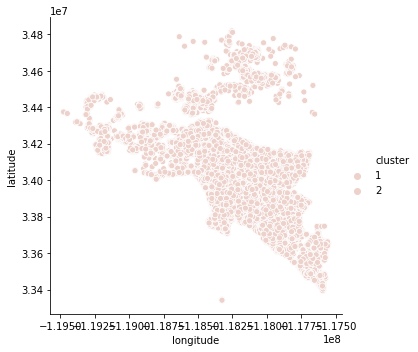

In [69]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
mvp_df['cluster'] = kmeans.predict(X1)

sns.relplot(data=mvp_df, x='longitude', y='latitude', hue='cluster')